## Logistic Regression Agenda

  * Attempt to use linear regression for classification
  * Logistic regression is a better alternative for classification
  * Brief overview of probability, odds, e, log, and log-odds
  * What is the logistic regression model?
  * Interpreting logistic regression coefficients
  * Compare logistic regression with other models
  
By the end of this portion of the class you will be able to:
  * Use logistic regression for a classification problem in the future
  * interpret the coefficients of a trained logistic regression model

### Predicting a categorical response

In the first part of today's lesson, we were attempting to predict a **continuous response**. However, what we want to do now is see if we can apply the same sort of logic to predict an outcome that has only 2 distinct possibilities, or what is known as a **categorical response.**

In machine learning parlance, we looked at **regression** when we were using linear regression, but we are now going to try to use the same approach for what is known as a **classification** problem (problems with only a discrete, finite number of outcomes; in our case, just 2).

As always, we are going to import all of the functionality we need before we get started:

In [1]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns

Now we are going to import a slightly different dataset. This dataset is also from the famed [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.html) and can be found [here](https://archive.ics.uci.edu/ml/datasets/Vertebral+Column).

This dataset contains 6 biomechanical features used to classify orthopaedic patients into 2 classes - normal and abnormal:
  * pelvic incidence
  * pelvic tilt
  * lumbar lordosis angle
  * sacral slope
  * pelvic radius
  * grade of spondylolisthesis
  
Lets load the data in:

In [2]:
vertebral_data = pd.read_csv("../data/vertebral_column_2_categories.dat", sep=" ",
                             names=["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","spondy_grade","outcome"])
vertebral_data.outcome.value_counts()

AB    210
NO    100
Name: outcome, dtype: int64

In order to use linear regression for this task, we have to convert our **categorical** target into a number:

In [3]:
vertebral_data["outcome_number"] = (vertebral_data.outcome=='AB').astype(int)
vertebral_data.outcome_number.value_counts()

1    210
0    100
Name: outcome_number, dtype: int64

Cool, so now our outcome is no longer a value, but a number. Let's plot `pelvic_incidence` relative to this new numeric `outcome_number`:

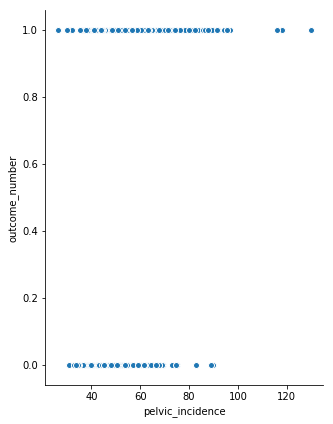

In [4]:
sns.pairplot(vertebral_data,x_vars=["pelvic_incidence"],y_vars="outcome_number", size=6, aspect=0.8)

And now lets do a simple linear regression on that feature like we did before:

In [5]:
# fit a linear regression model and store the predictions
feature_cols = ['pelvic_incidence']
X = vertebral_data[feature_cols]
y = vertebral_data.outcome_number
linreg = LinearRegression()
linreg.fit(X, y)
outcome_pred = linreg.predict(X)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


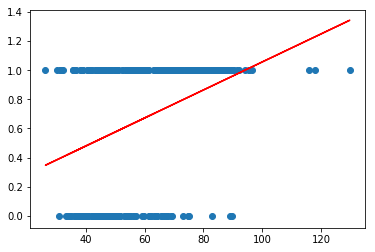

In [6]:
# scatter plot that includes the regression line
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, outcome_pred, color='red')

Lets examine the predictions:

In [7]:
outcome_pred[:10]

array([ 0.70173614,  0.47167114,  0.75740477,  0.76191585,  0.57389026,
        0.4830928 ,  0.60959496,  0.53223477,  0.51706986,  0.44892378])

If **pelvic_incidence=35**, what class do we predict for outcome? **0**

So, we predict the 0 class for **lower** values of `pelvic_incidence`, and the 1 class for **higher** values of `pelvic_incidence`. What's our cutoff value? Around **pelvic_incidence=45**, because that's where the linear regression line crosses the midpoint (0.5) between predicting class 0 and class 1.

So, we'll say that if **outcome_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [8]:
# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(outcome_pred >= .5, 1, 0)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1,

In [9]:
# transform predictions to 1 or 0
outcome_pred_class = np.where(outcome_pred >= 0.5, 1, 0)
outcome_pred_class

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1,

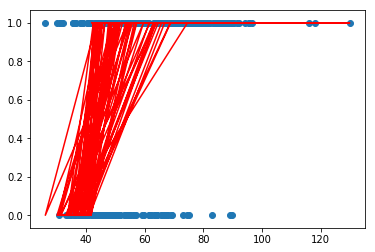

In [11]:
# plot the class predictions
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, outcome_pred_class, color='red')

What went wrong? This is a line plot, and it connects points in the order they are found. Let's sort the DataFrame by "al" to fix this:

In [13]:
# add predicted class to DataFrame
vertebral_data['outcome_pred_class'] = outcome_pred_class

# sort DataFrame by pelvic_incidence so that the line plot makes sense
vertebral_data.sort_values('pelvic_incidence', inplace=True)

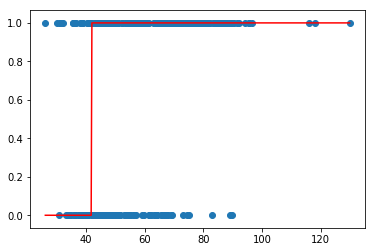

In [14]:
# plot the class predictions again
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, vertebral_data.outcome_pred_class, color='red')

### Use Logistic Regression Instead of Linear Regression on Categorical Outcome Variables

Logistic regression can do exactly what we just did:

In [15]:
logreg = LogisticRegression(C=1e9)
feature_cols = ['pelvic_incidence']
X = vertebral_data[feature_cols]
y = vertebral_data.outcome_number
logreg.fit(X, y)
outcome_pred_class_log = logreg.predict(X)

In [16]:
# print the class predictions
outcome_pred_class_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

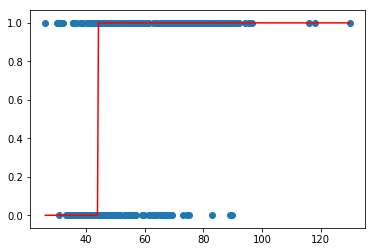

In [17]:
# plot the class predictions
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, outcome_pred_class_log, color='red')

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [19]:
# store the predicted probabilites of class 1
outcome_probs = logreg.predict_proba(X)[:, 1]

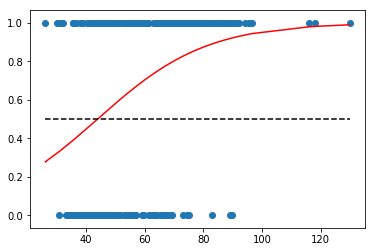

In [20]:
# plot the predicted probabilities, and the 50% line
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, outcome_probs, color='red')
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence,np.ones(outcome_probs.shape)*.5,'k--')

In [21]:
# examine some example predictions
print("Pelvic incidence of 15:", logreg.predict_proba(15))
print("Pelvic incidence of 10:", logreg.predict_proba(10))
print("Pelvic incidence of 55:", logreg.predict_proba(55))

Pelvic incidence of 15: [[ 0.82575878  0.17424122]]
Pelvic incidence of 10: [[ 0.8611287  0.1388713]]
Pelvic incidence of 55: [[ 0.35553129  0.64446871]]


What are these numbers? 

The first number in each entry indicates the predicted probability of **class 0**, and the second number in each entry indicates the predicted probability of **class 1**.

### Review: Probability, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [22]:
# create a table of probability versus odds
prob_table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999]})
prob_table['odds'] = prob_table.probability/(1 - prob_table.probability)
prob_table

,probability,odds
0,0.100,0.111111
1,0.200,0.250000
2,0.250,0.333333
3,0.300,0.428571
4,0.400,0.666667
5,0.500,1.000000
6,0.600,1.500000
7,0.700,2.333333
8,0.800,4.000000
9,0.900,9.000000


What is **e**? It is the base rate of growth shared by all continually growing processes:

In [23]:
# exponential function: e^1
np.exp(1)

2.7182818284590451

What is a **(natural) log**? It gives you the time needed to reach a certain level of growth ([wiki](https://en.wikipedia.org/wiki/Natural_logarithm)):

In [24]:
# time needed to grow 1 unit to 2.718 units
np.log(np.exp(1))

1.0

It is also the **inverse** of the exponential function ([review your properties of logarithms here](http://www.purplemath.com/modules/logrules.htm)):

In [25]:
np.log(np.exp(5))

5.0

In [26]:
# add log-odds to the table
prob_table['log_odds'] = np.log(prob_table.odds)
prob_table

,probability,odds,log_odds
0,0.100,0.111111,-2.197225
1,0.200,0.250000,-1.386294
2,0.250,0.333333,-1.098612
3,0.300,0.428571,-0.847298
4,0.400,0.666667,-0.405465
5,0.500,1.000000,0.000000
6,0.600,1.500000,0.405465
7,0.700,2.333333,0.847298
8,0.800,4.000000,1.386294
9,0.900,9.000000,2.197225


### Ok, but what is logistic regression?

[**Linear regression:**](https://en.wikipedia.org/wiki/Linear_regression) continuous response is modeled as a linear combination of the features used :

$$y = \beta_0 + \beta_1x + ... \beta_nx$$

[**Logistic regression:**](https://en.wikipedia.org/wiki/Logistic_regression) log-odds of a categorical response being "true" (or the number 1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x + ... \beta_nx$$

This is called the [**logit function**](https://en.wikipedia.org/wiki/Logit).

Probability is sometimes written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x + ... \beta_nx$$

The equation can be rearranged into the [**logistic function**](https://en.wikipedia.org/wiki/Logistic_function):

$$\pi = \frac{e^{\beta_0 + \beta_1x + ... + \beta_nx}} {1 + e^{\beta_0 + \beta_1x + ... + \beta_nx}}$$

Here's what that looks like:

![logistic curve](./images/logistic_curve.png)

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**:

$f(x)= 
\begin{cases}
    1,& \text{if } p\geq 0.5\\
    0,              & \text{otherwise}
\end{cases}$

The **logistic function** has some nice properties:

- Takes on an "s" shape (which allows it to be differentiable, a really important math property for functions to have)
- Output is bounded by 0 and 1

Some things to note:

- **Multinomial logistic regression** is used when there are more than 2 classes.
- Coefficients are estimated using **maximum likelihood estimation**, meaning that we choose parameters that maximize the likelihood of the observed data. We do this using fancy math involving taking derivatives, and thats why that S-shaped curve is so important.

### Interpreting Logistic Regression Coefficients

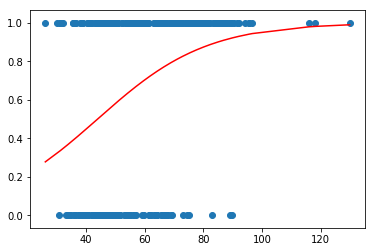

In [27]:
# plot the predicted probabilities again
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, outcome_probs, color='red')

In [28]:
# compute predicted log-odds for pelvic_incidence=55 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 55
print("Log odds:",logodds)

Log odds: [ 0.59481302]


In [29]:
# convert log-odds to odds
odds = np.exp(logodds)
print("odds:",odds)

odds: [ 1.81269197]


In [30]:
# convert odds to probability, this is the number you would see in the plot above where x= 55
prob = odds/(1 + odds)
print("probability:",prob)

probability: [ 0.64446871]


In [31]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(55)[:, 1]

array([ 0.64446871])

In [32]:
# examine the coefficient for al
list(zip(feature_cols, logreg.coef_[0]))

[('pelvic_incidence', 0.053766875792266015)]

**Interpretation:** A 1 unit increase in `pelvic_incidence` is associated with a ~0.054 unit increase in the log-odds of `outcome`, where a positive outcome is having a vertebral abnormality (not positive in the real world, but positive in how we coded our outcome feature).

In [33]:
# increasing pelvic_incidence by 1 (so that pelvic_incidence=56) increases the log-odds by about 0.054
logodds = 0.59481302 + 0.053766875792266015
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.65669037411903475

In [34]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(56)[:, 1]

array([ 0.65669037])

### What does this mean actually? 

**Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).**

In [35]:
# examine the intercept
logreg.intercept_

array([-2.36236515])

**Interpretation:** For a 'pelvic_incidence' value of 0, the log-odds of 'outcome' is -2.36.

In [36]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.08608793])

That makes sense from the plot above, because the probability of outcome=1 should be very low for such a low `pelvic_incidence` value.

![logistic betas example](./images/logistic_betas_example.png)

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

The non-bias $\beta$ coefficients are effectively estimates of how certain you are of the outcome given how much evidence that specific feature gives you. A really high magnitude (positive or negative) value means you are very certain of the outcome, given you know that feature's value.

### How do we measure model performance for classification problems?

Now that we have a trained model just as we did before with linear regression, what is our **evaluation metric/loss function**?

There are two common (inverse) measurements we can make that capture the performance of our classification model:
  * **Classification accuracy**: percentage of correct predictions (**reward function**)
  * **Classification error**: percentage of incorrect predictions (**loss function**)

In our case, we are going to use classification accuracy. Let's compute our classification accuracy after training on the whole dataset, using our just-trained one-feature model and the scikit-learn method `accuracy_score`:

In [37]:
y = vertebral_data.outcome_number
y_pred = outcome_pred_class
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

Model accuracy: 0.625806451613


68% is ok, but its not really fantastic. Can we do better? (YES WE CAN!)

#### Exercise Time!!
  * Generate the logistic regression model incorporating all of the features we have available to predict `outcome_number` and get the accuracy when training and testing on all data. How much better is this than the case where we trained our model using only `pelvic_incidence`?
  * Use train/test split with 70% training, 30% testing and get the test error of the model trained on all features using `train_test_split` like we did during linear regression 
  * Inspect all of the model coefficients of the model trained on all features. Which feature is the most important for the prediction? Which is the least important?
  * What are some problems you can see in using the data like we have been? (Look at the fraction of positive and negative outcomes in the dataset)

In [38]:
pass

### Comparing Logistic Regression with Other Models

Logistic regression has some really awesome advantages:

  * It is a highly interpretable method (if you remember what the conversions from log-odds to probability are)
  * Model training and prediction are fast
  * No tuning is required (excluding regularization, which we will talk about later)
  * No need to scale features
  * Outputs well-calibrated predicted probabilities (the probabilities behave like probabilities)

However, logistic regression also has some disadvantages:

  * It presumes a linear relationship between the features and the log-odds of the response
  * Compared to other, more fancypants modeling approaches, performance is (generally) not competitive with the best supervised learning methods
  * Like linear regression for regression, it is sensitive to irrelevant features
  * Unless you explicitly code them (we will see how to do that later), logistic regression can't automatically learn feature interactions